# Simple Linear Regression

Simple Linear Regression refers to one independent variable to make a prediction

the equation for Simple Linear Regression is Y= a + bx

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
lm=LinearRegression()
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']]
Y = df[['price']]

find the linear model using the highway-mpg

In [7]:
lm.fit(X,Y)

LinearRegression()

outout the prediction

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

finding the value of the intercept

In [9]:
lm.intercept_

array([38423.30585816])

find the value of slope/gradient

In [10]:
lm.coef_

array([[-821.73337832]])

function for predicting the price is as follows is as follows Yhat=a+bx where a is the intercept and b is the gradient/slope

In [11]:
Yhat=38423.30585816 +-821.73337832 *X
price = 38423.30585816 +-821.73337832*df[['highway-mpg']]
price.head()

,highway-mpg
0,16236.504644
1,16236.504644
2,17058.238022
3,13771.304509
4,20345.171535


# Multiple Linear Regression

Multiple Linear Regression will refer to multiple independent variable to make a prediction

the equation for multiple linear regression is Yhat = a + b_1X_1,b_2X_2 + b_3X_3 + b_4X_4

other good predictors for price are as follows Horsepower Curb-weight Engine-size Highway-mpg

In [12]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

fit the model

In [13]:
lm.fit(Z,df['price'])

LinearRegression()

value of the y-intercept

In [14]:
lm.intercept_

-15806.62462632922

value of the slope/gradient

value of the gradient/slope

In [15]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [16]:
Price = -15678.742628061467 + 52.65851272 *df['horsepower'] + 4.69878948 * df['curb-weight'] + 81.95906216 * df['engine-size'] + 33.58258185 * df['highway-mpg']
Price.head()

0    13700.275670
1    13700.275670
2    19026.275609
3    10614.511915
4    15531.617081
dtype: float64

# Model Evaluation using Visualization

Visualizing highway-mpg as a potential predictor

(0.0, 48174.50590630589)

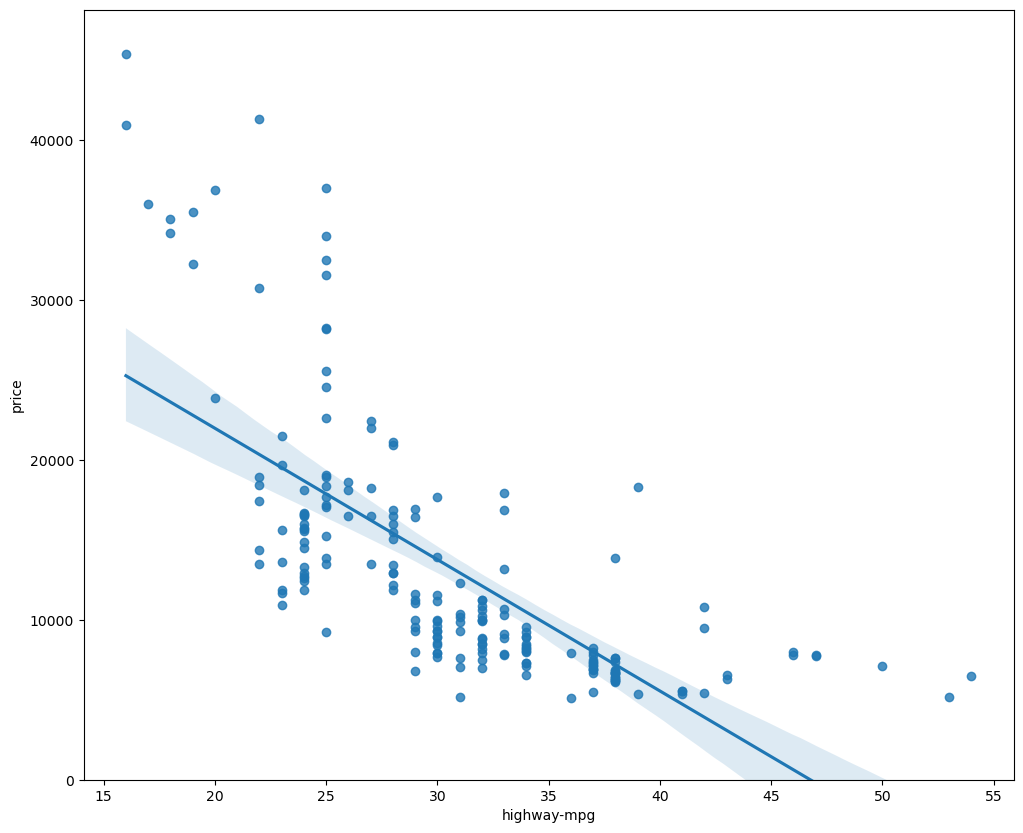

In [17]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative

visualizing peak-rpm

(0.0, 47414.1)

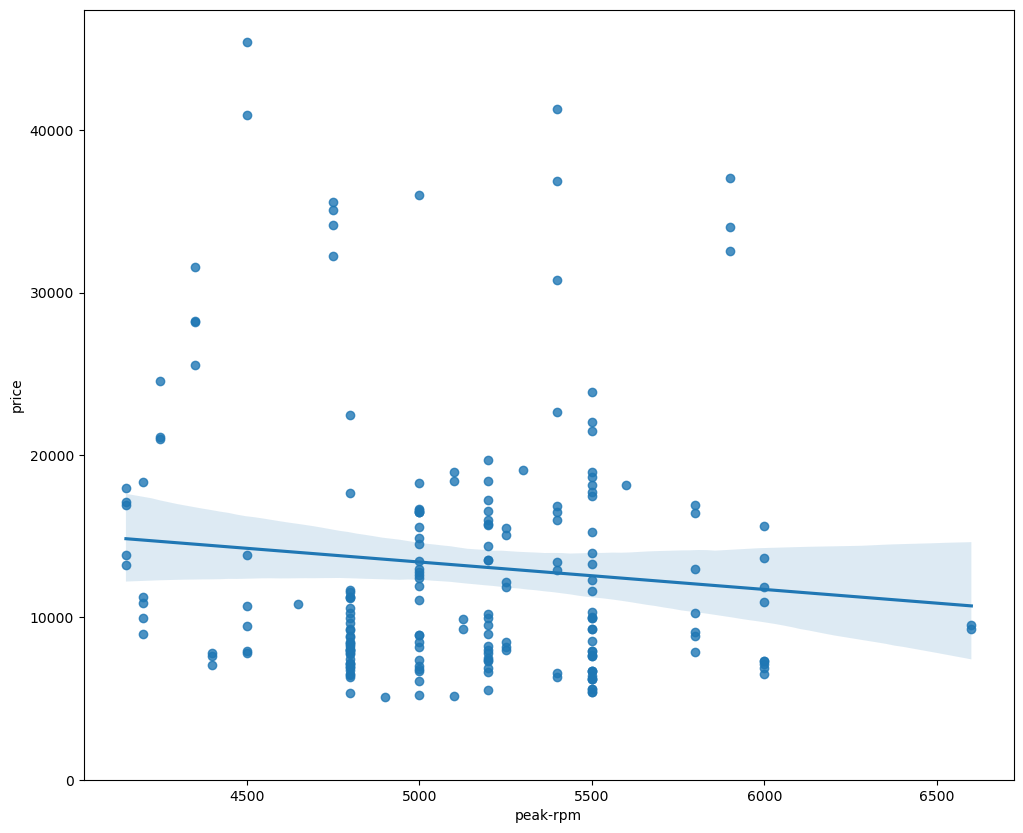

In [18]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [19]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


### residual plot
this is a graph that shows the residual on the vertical y-axis and the independent variable on the horizontal x-axis
when loooking at a residual plot, we pay attention to the residual i.e.
if the points in the residual plot are randomly spread out around the axis, then a linear model is apppropriate for the data

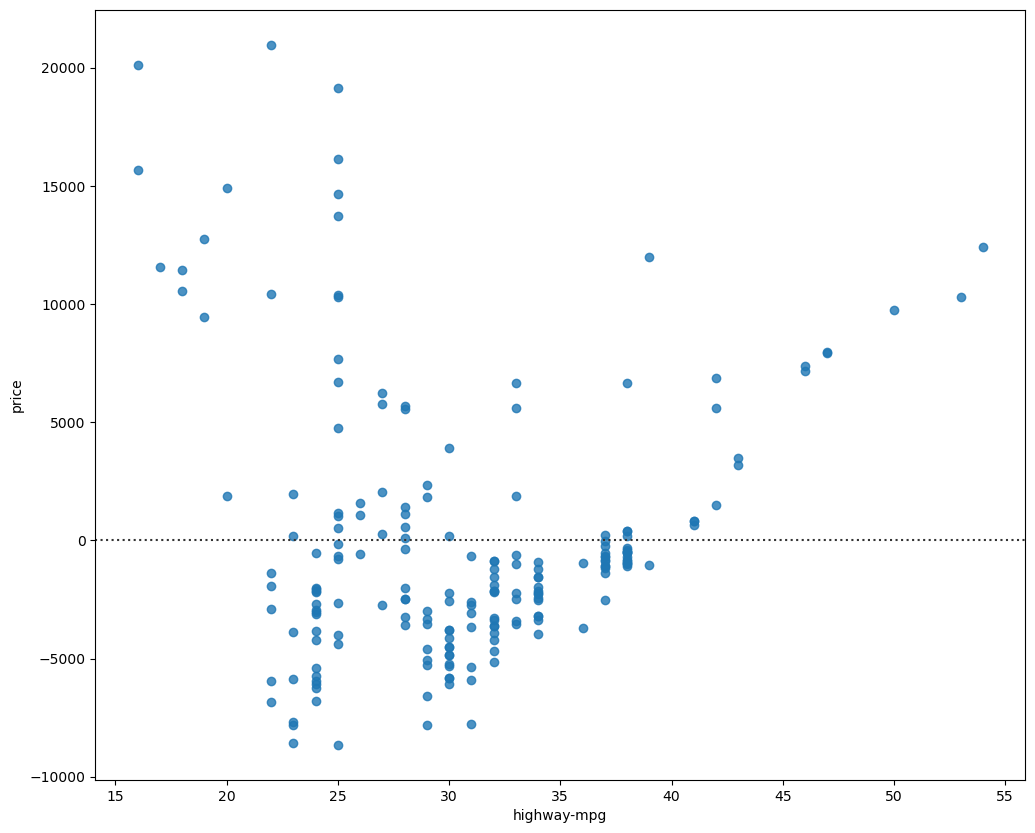

In [20]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

how to visualize multiple linear regression

In [21]:
Y_hat = lm.predict(Z)

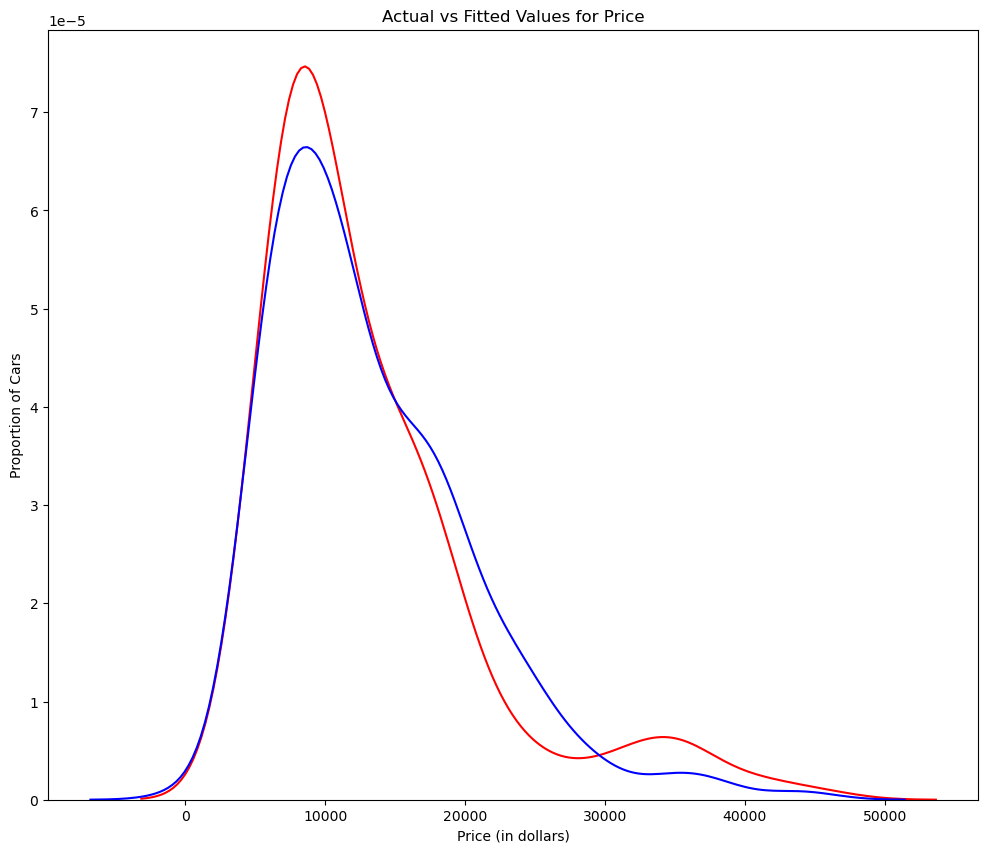

In [22]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression and Pipelines
This is a special case for the general simple linear regression and multiple linear regression

In [23]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [24]:
x=df['highway-mpg']
y=df['price']

In [25]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


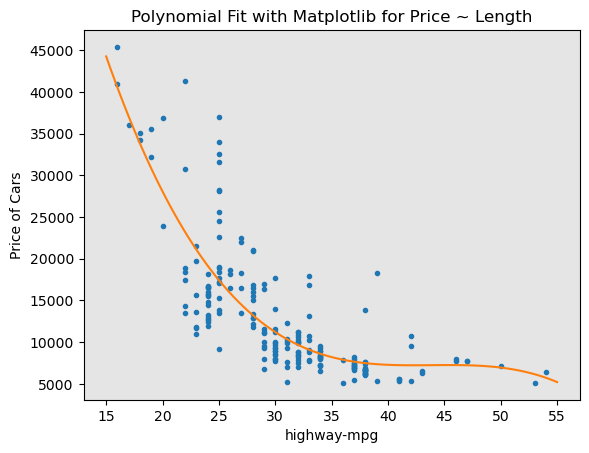

In [26]:
PlotPolly(p, x, y, 'highway-mpg')

In [27]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


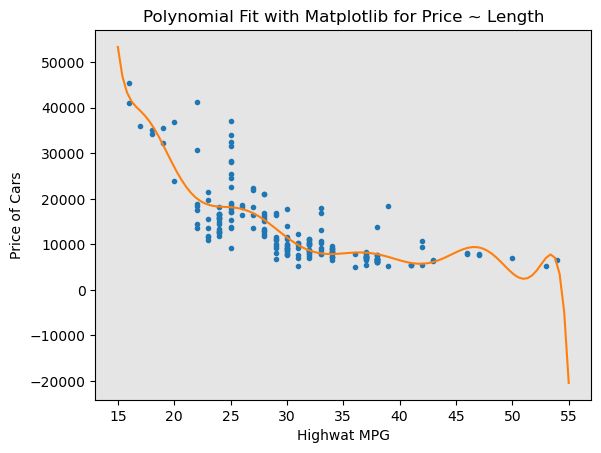

In [28]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highwat MPG')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


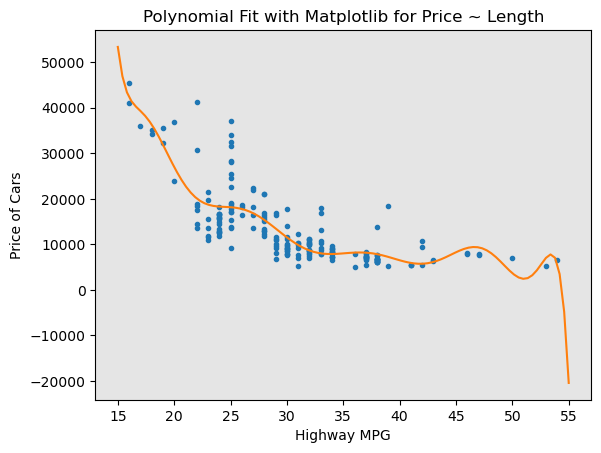

In [29]:
f2 = np.polyfit(x, y, 11)
p1 = np.poly1d(f2)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

Polynomial transformation on multiple features

In [30]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures of degree 2

In [31]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [32]:
z_pr=pr.fit_transform(Z)

In [33]:
Z.shape

(201, 4)

In [34]:
z_pr.shape

(201, 15)

## Pipelines

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [36]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [37]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [38]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [40]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measure for In Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).


### Model 1:Simple Linear Regression

In [41]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [42]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of the price and predicted value is: ', mse)

The mean square error of the price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [45]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [46]:
Y_predict_multifit = lm.predict(Z)

In [47]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

In [48]:
from sklearn.metrics import r2_score

In [49]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [50]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

In [51]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [52]:
lm.fit(X, Y)
lm

LinearRegression()

In [53]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

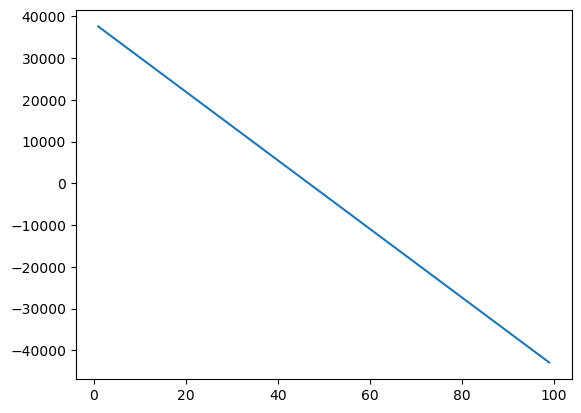

In [54]:
plt.plot(new_input,yhat)
plt.show()